##Installation

In [ ]:
# Step 1: Install Condacolab to set up Miniconda
!pip install -q condacolab
import condacolab
condacolab.install()
# Note: This installation will reset the session.
# IMPORTANT: There should be two separate cells. After the reset, please run the following cell.
# If you try to run all the cells at once, the session reset will interrupt the process and prevent the next cell from running.


✨🍰✨ Everything looks OK!


In [ ]:
# Step 1a: which version of python am I running?
!python --version
condacolab.check()

# Step 2: Create a Conda environment (in this case called "SDAL") with Python 3.10 and activate it
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

# Step 3: Install ROOT 6.28.104 in the Conda SDAL environment
!conda install -c conda-forge root=6.28.10 -y

#from next time we will use these lines
#If this is your first time using it, check the 'Check paths' section below to understand what the PATH modification does.
#If you are already familiar with it, simply remove the two triple quotes (''' ''') in this cell and skip the 'Check paths' section to continue with the next part."

# In Google Colab, the Conda environment we created (SDAL) is not automatically used in new cells.
# Each Colab cell works in a separate shell, and by default, it does not recognize the custom environment.
# To ensure that our environment is used in all cells, we manually set PATH and PYTHONPATH.
import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"


Python 3.10.16
✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/SDAL

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/linux-64::ca-certificates-2025.1.31-hbcca054_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_4 
  libexpat           conda-forge/linux-64::libexpat-2.7.0-h5888daf_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-

##Check paths

This section is prepared for those who are curious about why we modify the `PATH` and how it looks before and after the change. If you prefer to proceed directly to running the code, you can skip this part while following the explanation in the second cell.

In [ ]:
import os

# In Google Colab, the default PATH does not include our custom Conda environment.
# Each Colab cell runs in an isolated shell, so newly created environments are not automatically recognized.
# To confirm this, let's print the original PATH variable line by line.

print("Original PATH:")
for path in os.environ["PATH"].split(":"):
    print(path)

In [ ]:
# We need to manually add our Conda environment (SDAL) to the PATH.
# This ensures that the environment is recognized in all new cells.

os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]

# Now, let's print the updated PATH to verify that the new environment is added.
# The first entry should be "/usr/local/envs/SDAL/bin".

print("Updated PATH:")
for path in os.environ["PATH"].split(":"):
    print(path)

In [ ]:
# In Google Colab, PYTHONPATH determines where Python looks for packages.
# If it is not set, Python will use the system default directories.
# Let's check its initial value before modifying it.

print("Original PYTHONPATH:", os.environ.get("PYTHONPATH"))
print("Original Python version:", sys.version)

In [ ]:
# To ensure that our Conda environment uses Python 3.10 packages,
# we need to set PYTHONPATH to point to the correct site-packages directory.

os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"

# Now, let's check the updated PYTHONPATH to confirm that Python 3.10 is being used.

print("Updated PYTHONPATH:", os.environ["PYTHONPATH"])

##START HERE


$$
\LARGE \color{red}{\textbf{! If the session crashes, please start from here. !}}
$$

In [ ]:
import ROOT
print(ROOT.gROOT.GetVersion())

# for not interactive use (not our case) :
# ROOT.gROOT.SetBatch(True)

Welcome to JupyROOT 6.28/10
6.28/10


## **ROOT Basics: Calculator - I**

You can use `ROOT` interactive shell as a calculator!
ROOT offers you not only to type in C++ statements but also to use advanced mathematical functions
living in the `TMath` namespace. (`TMath` library comes by default with `ROOT`)

**Example calculations in PyROOT**

Below, we replicate the interactive `ROOT` calculations in `PyROOT`.


In [ ]:
# Square root of 3
sqrt_3 = ROOT.TMath.Sqrt(3)
print(f"sqrt(3) = {sqrt_3}")

# Value of Pi
pi_value = ROOT.TMath.Pi()
print(f"Pi = {pi_value}")

# Error function evaluation at 0.2
erf_02 = ROOT.TMath.Erf(0.2)
print(f"Erf(0.2) = {erf_02}")

# Integer arithmetic operation
result = 5 * 898 / (56 - 37)
print(f"5 * 898 / (56 - 37) = {result}")


sqrt(3) = 1.7320508075688772
Pi = 3.141592653589793
Erf(0.2) = 0.22270258921047845
5 * 898 / (56 - 37) = 236.31578947368422


**A numerical example with a geometrical series**

A geometric series follows the formula:

$$
\sum_{i=0}^{\infty} x^i = \frac{1}{1-x}, \quad \text{if} \quad |x| < 1
$$

Otherwise:
- If $ x \geq 1 $, the series diverges.
- If $ x < -1 $, the series is irregular.

**Example calculation using PyROOT**

We will sum the first 30 terms of the geometric series for $x = 0.5$.

In [ ]:
# Define variables
x = 0.5  # Base of the geometric series
N = 30  # Number of terms in the summation

# Initialize series sum
geom_series = 0.0

# Compute the geometric series sum
for i in range(N):
    geom_series += ROOT.TMath.Power(x, i)

# Print the computed sum
print(f"Sum of geometric series (x={x}, N={N}): {geom_series}")


Sum of geometric series (x=0.5, N=30): 1.9999999981373549


In [ ]:
# Compute the expected theoretical value
theoretical_value = (1 - ROOT.TMath.Power(x, N+1)) / (1 - x)

print(f"Theoretical value: {theoretical_value}")

# Verify the result
difference = ROOT.TMath.Abs(geom_series - theoretical_value)
print(f"Verification: |Computed - Theoretical| = {difference}")


Theoretical value: 1.9999999990686774
Verification: |Computed - Theoretical| = 9.313225746154785e-10


## **ROOT as a Function Plotter - I**


For instance, you can use **ROOT's class TF1** to display a function of one variable \( x \).

**Creating a Function with TF1**

In ROOT, a function is defined using the **TF1** class with the following parameters:

- **Name** (string): Identifier for the function.
- **Function** (string): The mathematical expression for the function.
- **Range** (two double values): The lower and upper bounds of \( x \).

The `Draw()` method, when called without any parameters, displays the function graphically.

Below, we define and plot the function:

$$ f(x) = \frac{\sin(x)}{x}, \quad x \in [0,10]$$


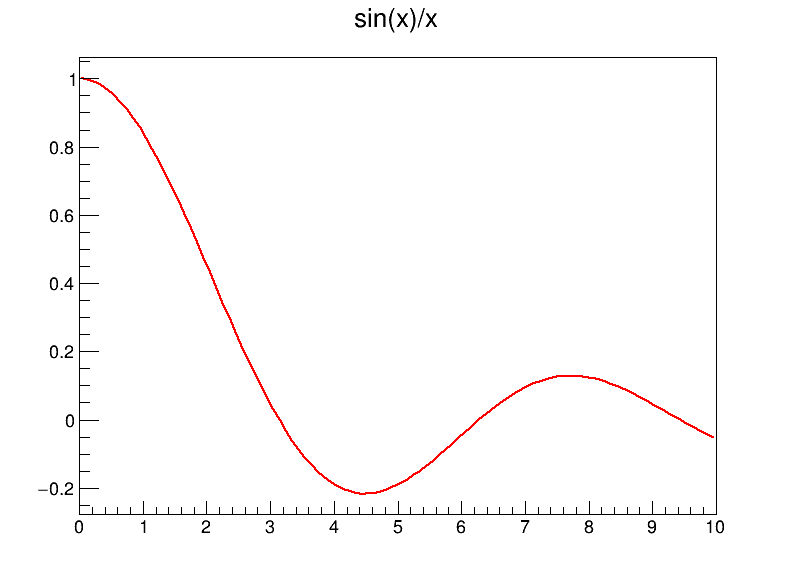

In [ ]:
# Define the function using TF1
f1 = ROOT.TF1("f1", "sin(x)/x", 0, 10)

# Create a canvas to draw the function
c1 = ROOT.TCanvas("c1", "Function Plot", 800, 600)

# Draw the function on the canvas
f1.Draw()

# Display the canvas
c1.Draw()


In [ ]:
c1.Close()
del c1, f1

**Changing the range definition**

By modifying the range in the **TF1** definition, we can expand the function domain:

$$ f(x) = \frac{\sin(x)}{x}, \quad x \in [-50,50] $$

Since Jupyter Notebook does not allow reusing the same `TCanvas` object without deletion, we will first delete the previous canvas (if it exists) and then create a new one.

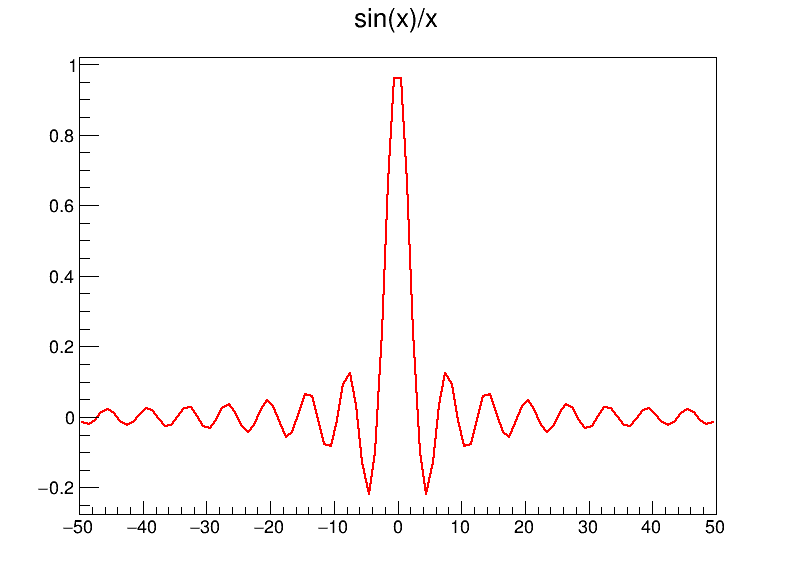

In [ ]:
# Define the function with a new range
f2 = ROOT.TF1("f2", "sin(x)/x", -50, 50)

# Create a new canvas
c2 = ROOT.TCanvas("c2", "Function Plot", 800, 600)

# Draw the function
f2.Draw()

# Display the canvas
c2.Draw()

In [ ]:
c2.Close()
del c2, f2

Let's consider a slightly extended version of the function plotter.

 **Using Parameters in TF1**

We define a function:

$$
f(x) = p_0 \cdot \frac{\sin(p_1 \cdot x)}{x}, \quad x \in [-10,10]
$$

where $p_0$ and $p_1$ are adjustable parameters. These values can be updated using:

SetParameter(parameter_number, parameter_value)

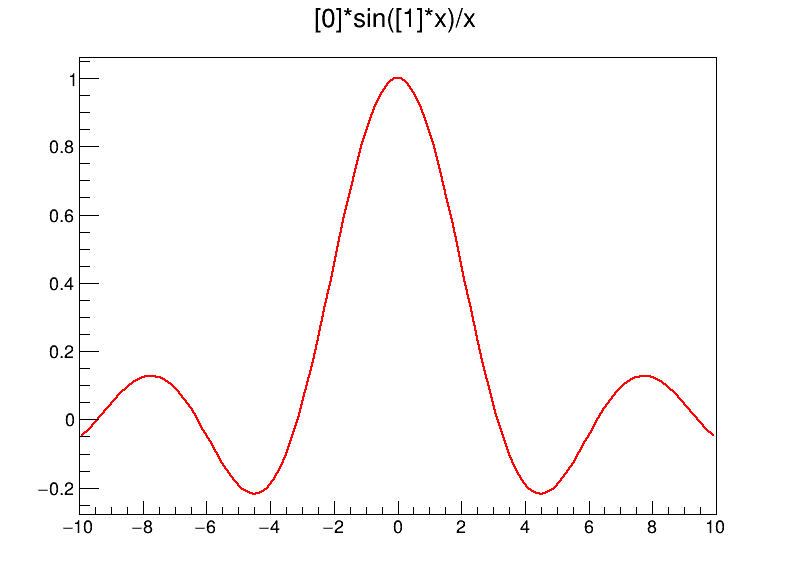

In [ ]:
f3 = ROOT.TF1("f3", "[0]*sin([1]*x)/x", -10, 10)
f3.SetParameter(0, 1)
f3.SetParameter(1, 1)
c3 = ROOT.TCanvas("c3", "Parameterized Function Plot", 800, 600)
f3.Draw()
c3.Draw()


In [ ]:
c3.Close()
del c3

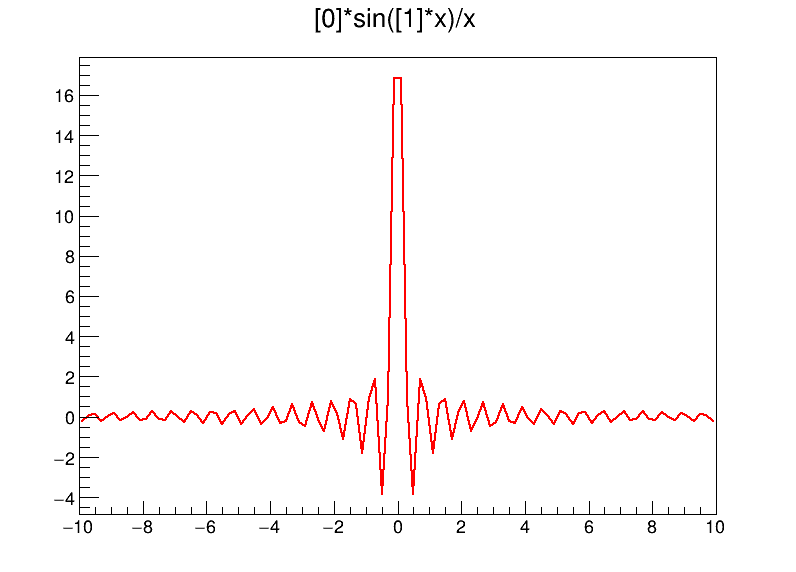

In [ ]:
f3.SetParameter(0, 2)
f3.SetParameter(1, 10)
c4 = ROOT.TCanvas("c4", "Parameterized Function Plot", 800, 600)
f3.Draw()
c4.Draw()

In [ ]:
c4.Close()
del c4, f3

## **ROOT I/O with text file -example**

In this section, we will read a text file (histo.txt) containing numbers listed line by line and plot its graph. Since we don't have a ready-made file at the moment, we will create and save it manually once, and then read it.

In [ ]:
some_numbers = [34, 33, 30, 43, 43, 30, 33, 41, 31, 34, 26, 32, 34, 35, 26, 34, 40, 30, 49, 38, 39 ,37,
           48, 36, 37, 44, 37, 53, 65, 104, 147, 203, 255, 338, 375, 346, 234, 196, 124, 70, 52, 48, 35,
           28, 31, 30, 27, 27, 28, 31, 37, 36, 47, 50, 73, 105, 145, 143, 120, 111, 117, 78, 68, 57, 33,
           37,42, 50, 56, 63, 90, 95, 73, 67, 75, 51, 35, 36,43, 37, 40, 33, 42, 41, 39, 42, 41, 37, 37, 37, 36, 33, 30, 43, 41, 45, 33, 33, 39, 40, 45
               ]
print(len(some_numbers))

101


In [ ]:
with open("histo.txt", "w") as _file:
    for numb in some_numbers:
        _file.write(str(numb) + "\n")

print("Some numbers written in histo.txt")

Some numbers written in histo.txt


Info in <TCanvas::Print>: png file histo.png has been created


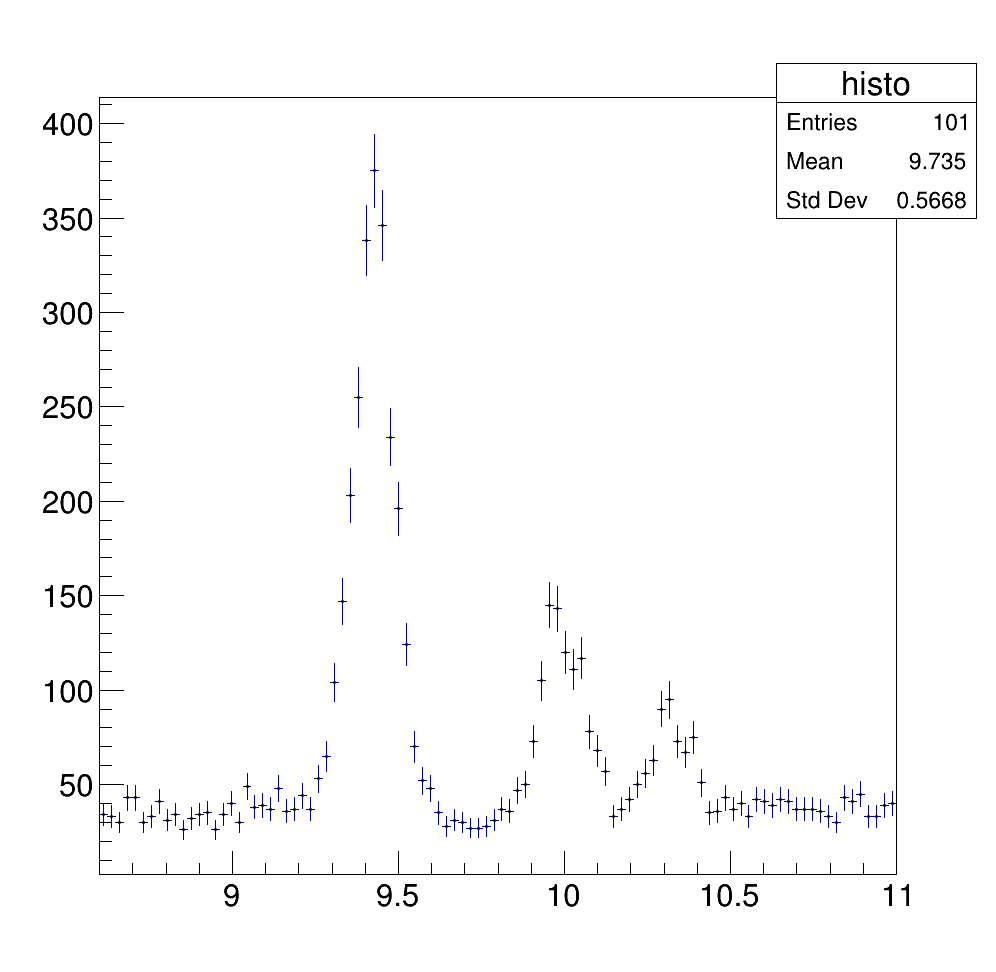

In [ ]:
import math

# Create histogram and canvas
histo = ROOT.TH1F("histo", "", 100, 8.6, 11.0)  # Create a histogram (100 bins from 8.6 to 11.0)
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)

# Open the input file
inputHisto = open("histo.txt", "r")

# Read data from the file and fill the histogram
counter = 1
while True:
    line = inputHisto.readline()  # Read one line at a time
    if not line:  # End of file reached
        break
    buffer = float(line.strip())  # Convert the string to a float
    histo.SetBinContent(counter, buffer)  # Set bin content
    histo.SetBinError(counter, math.sqrt(buffer))  # Set bin error (sqrt of content)
    counter += 1

# Customize histogram appearance
histo.SetMarkerStyle(20)
histo.SetMarkerSize(0.4)

# Draw the histogram
histo.Draw("p")

# Write the histogram to the file
file = ROOT.TFile("file.root", "RECREATE")
histo.Write()

canvas.SaveAs("histo.png")
canvas.Draw()


In [ ]:
inputHisto.close()
del inputHisto, canvas, histo, file

## **ROOT Global Pointers**

All global pointers in ROOT begin with a small “g”; the most important are:

- **gROOT**: the `gROOT` variable is the entry point to the `ROOT` system. Technically it is an instance of the `TROOT` class. Using the `gROOT` pointer one has access to basically every object created in a `ROOT` based program. The `TROOT` object is essentially a container of several lists pointing to the main `ROOT` objects.
- **gRandom**: the `gRandom` variable is a variable that points to a random number generator instance of the type `TRandom3`. Such a variable is useful to access in every point of a program the same random number generator, in order to achieve a good quality of the random sequence.
- **gStyle**: By default `ROOT` creates a default style that can be accessed via the `gStyle` pointer. This class includes functions to set some of the following object attributes.
    - Canvas
    - Pad
    - Histogram axis
    - Lines
    - Fill areas
    - Text
    - Markers
    - Functions
    - Histogram Statistics and Titles
- **gSystem**: An instance of a base class defining a generic interface to the underlying Operating System, in our case `TUn1xSystem`.

We will use in the following cells **gStyle** and **GRandom**.

## **How to make a Graph: TGraph**

**Plotting Daily Maximum Temperatures in Bari (July 2017) with Error Bars**

In this section, we will create a graph displaying the **daily maximum temperatures in Bari during July 2017**, including error bars to represent uncertainties.

To achieve this, we will define four lists:

1. **Days (`x`)** – The days of July (1 to 31).  
2. **Maximum Temperatures (`y`)** – The recorded maximum temperatures (°C) for each day.  
3. **Temperature Errors (`yErr`)** – The uncertainty in temperature measurements (±1°C or ±2°C).  
4. **Day Errors (`xErr`)** – The uncertainty in the recorded day (±0.5 days).  

Using this data, we will generate a **TGraphErrors** in ROOT and visualize the variations in temperature along with their associated uncertainties.


Info in <TCanvas::Print>: png file myMaxTempJuly2017.png has been created


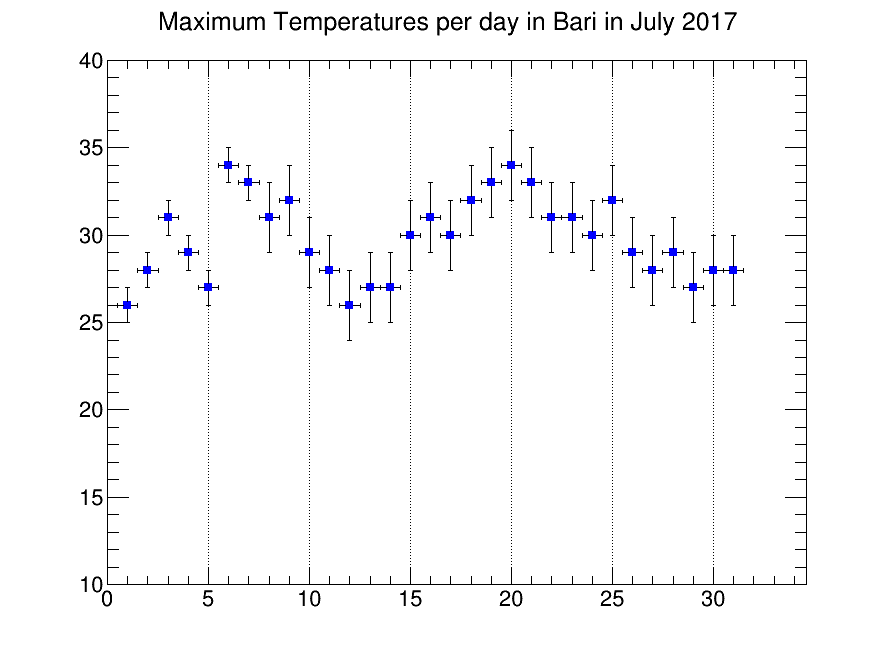

In [ ]:
import array

# Configuration of graphical style
ROOT.gStyle.SetCanvasColor(0)
ROOT.gStyle.SetPadColor(0)
ROOT.gStyle.SetOptStat(ROOT.kFALSE)
ROOT.gStyle.SetTitleXOffset(0.9)
ROOT.gStyle.SetTitleYOffset(1.15)
ROOT.gStyle.SetPadTopMargin(0.09)
ROOT.gStyle.SetPadBottomMargin(0.13)
ROOT.gStyle.SetPadLeftMargin(0.12)
ROOT.gStyle.SetPadRightMargin(0.10)
ROOT.gStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetStatFont(42)
ROOT.gStyle.SetTitleFont(42)
ROOT.gStyle.SetTitleSize(1)

# Create a new canvas
MyC = ROOT.TCanvas("MyC", "A simple Graph with error bars", 900, 700)
MyC.SetBorderSize(2)
MyC.SetFrameFillColor(0)
MyC.SetGridx(1)
MyC.SetGridy(0)
MyC.cd()

# Data for the plot (temperature values and errors)
myMaxTemp = array.array('f', [26., 28., 31., 29., 27., 34., 33., 31., 32., 29., 28., 26., 27., 27., 30., 31., 30., 32., 33., 34., 33., 31., 31., 30., 32., 29., 28., 29., 27., 28., 28., 26.])
x = array.array('f', [1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.])
yErr = array.array('f', [1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
xErr = array.array('f', [0.5]*31)

# Create TGraphErrors
myTempGraph = ROOT.TGraphErrors(31, x, myMaxTemp, xErr, yErr)

# Set graph attributes
myTempGraph.SetTitle("Maximum Temperatures per day in Bari in July 2017")
myTempGraph.SetMarkerColor(4)  # Green
myTempGraph.SetMarkerStyle(21)
myTempGraph.SetMaximum(40.)
myTempGraph.SetMinimum(10.)

# Draw the graph
myTempGraph.Draw("AP")

# Update the canvas
MyC.Update()
MyC.Draw()

# Save the canvas to a file
extens = ".png"  # You can change the extension as needed
MyC.SaveAs(f"myMaxTempJuly2017{extens}")




In [ ]:
MyC.Close()
del MyC, myTempGraph

## **ROOT File Operations: Writing and Reading Data**


ROOT provides the **TFile** and **TTree** classes to efficiently store and retrieve large amounts of data.  
This is particularly useful in **high-energy physics experiments**, where data is often stored in **ROOT files (.root)** format.

**How does it work?**

1. We **create a ROOT file** (`.root`), define a **TTree**, and add **two branches (`x` and `y`)** to store random data.
2. We **fill the tree** with 10,000 random values:
   - `x` follows a **Gaussian distribution** (mean = 0, sigma = 1).
   - `y` follows a **Uniform distribution** in the range [-5, 5].
3. We **write the tree to the ROOT file** and **close it** to save the data.

Later, we can **reopen the file, extract the stored data, and plot it using ROOT histograms**.


In [ ]:
import array #array is a module (and necessary to work with ROOT to create tree)

### Step 1: Creating and Writing Data to a ROOT File ###

# Create a TTree object with the name "T" and title "Example Tree" in "RECREATE" mode (i.e. overwrite if exists)
file = ROOT.TFile("example.root", "RECREATE")

# Create a TTree object
tree = ROOT.TTree("T", "Example Tree")

# Define a variable (float array) and associate it with the tree
x = array.array('f', [0])  # Float array with a single element, initialized to 0.
                           # If you need N elements, use [0] * N to create an array of size N.
y = array.array('f', [0])  # Second float array to hold values for the new branch

tree.Branch("x", x, "x/F")  # Create a branch in the tree. "x/F" means the branch is named "x" and stores floating-point (F) values
tree.Branch("y", y, "y/F")  # Create the second branch with Uniform distribution

# Fill the tree with 10,000 random values
for _ in range(10000):
    x[0] = ROOT.gRandom.Gaus(0, 1)  # generating a Stadrad Gaussian (Mean=0, Sigma=1)
    y[0] = ROOT.gRandom.Uniform(-5, 5)  # Uniform distribution between -5 and 5 for y

    tree.Fill()

# Write the tree to the file and close it
tree.Write()
file.Close()

print("ROOT file 'example.root' created successfully!")




ROOT file 'example.root' created successfully!


If you already have a pre-existing ROOT file, we can browse its contents to see what data it holds. Even though we have just created our own file, let's browse its internal structure.

In [ ]:
# Open the ROOT file
file = ROOT.TFile("example.root", "READ")

# List all keys (objects) in the ROOT file
file.ls()  # This will show the names of the trees, histograms, and other objects in the file

TFile**		example.root	
 TFile*		example.root	
  KEY: TTree	T;1	Example Tree


In [ ]:
# Optionally, you can also print more detailed information about the TTree:
tree = file.Get("T")
tree.Print()  # This prints information about the tree, including its branches and types

# Close the file
file.Close()

******************************************************************************
*Tree    :T         : Example Tree                                           *
*Entries :    10000 : Total =           81550 bytes  File  Size =      74789 *
*        :          : Tree compression factor =   1.08                       *
******************************************************************************
*Br    0 :x         : x/F                                                    *
*Entries :    10000 : Total  Size=      40599 bytes  File Size  =      37276 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.08     *
*............................................................................*
*Br    1 :y         : y/F                                                    *
*Entries :    10000 : Total  Size=      40599 bytes  File Size  =      37048 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [ ]:
# Set global axis styles for all ROOT plots
ROOT.gStyle.SetTitleSize(0.04, "XY")  # Set title size for X and Y axes
ROOT.gStyle.SetLabelSize(0.03, "XY")  # Set label size for X and Y axes
ROOT.gStyle.SetTitleOffset(1.2, "X")  # Set X-axis title offset
ROOT.gStyle.SetTitleOffset(1.4, "Y")  # Set Y-axis title offset

ROOT.gStyle.SetOptStat(0)  # Disable statistics box


Data successfully read and plotted from 'example.root'!


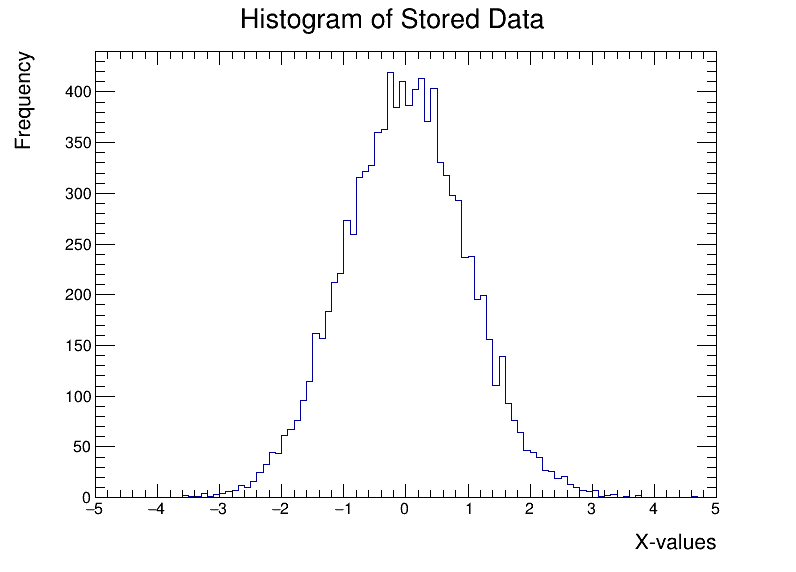

In [ ]:
### Step 2: Reading Data from the ROOT File and Plotting ###

# Open the ROOT file
file = ROOT.TFile("example.root", "READ")

# Retrieve the tree
tree = file.Get("T")

# Create a histogram to fill with tree data
hist = ROOT.TH1F("hist", "Histogram of Stored Data; X-values; Frequency", 100, -5, 5)

# Fill histogram with values from the tree
for entry in tree:
    hist.Fill(entry.x)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "Histogram from ROOT File", 800, 600)
hist.Draw()
canvas.Draw()

print("Data successfully read and plotted from 'example.root'!")

y-values successfully read and plotted from 'example.root'!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_y


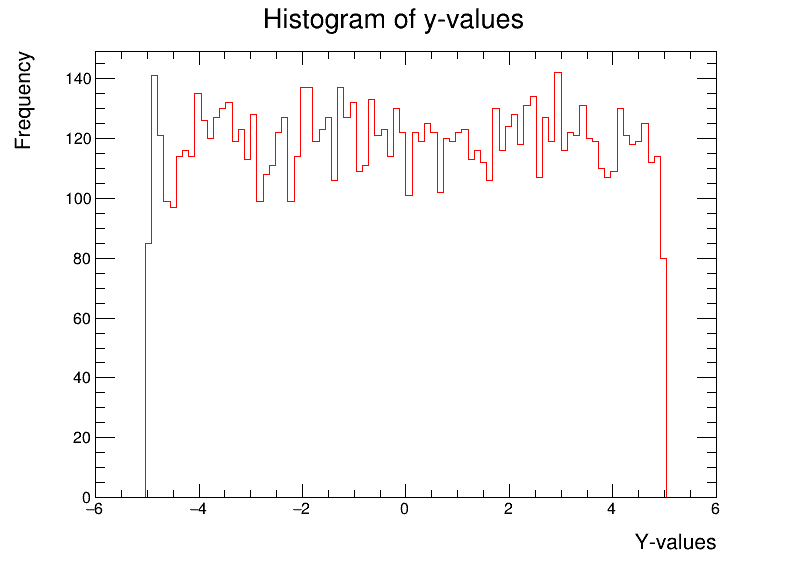

In [ ]:
# Create a new histogram for 'y' values
hist_y = ROOT.TH1F("hist_y", "Histogram of y-values; Y-values; Frequency", 100, -6, 6)

# Fill histogram with 'y' values from the tree
for entry in tree:
    hist_y.Fill(entry.y)

# Draw the new histogram
canvas_y = ROOT.TCanvas("canvas_y", "Histogram from ROOT File", 800, 600)
hist_y.SetLineColor(ROOT.kRed)  # Change the color if desired
hist_y.SetMinimum(0)
hist_y.Draw()  # Draw the histogram

canvas_y.Draw()

print("y-values successfully read and plotted from 'example.root'!")


In [ ]:
file.Close()
canvas.Close()
del file, canvas, hist_y

## **2D Histogram (TH2F) in PyROOT**

**Two-Dimensional Data Representation in ROOT**

In many physics analyses, we deal with correlations between two variables.  
A **2D histogram (`TH2F`)** is used to **study distributions in two dimensions**, where each bin represents the frequency of occurrences for a given (x, y) pair.

**ROOT Implementation**

We will:
1. Generate **Gaussian-distributed (x, y) pairs** and fill a `TH2F` histogram.
2. Store the histogram in a **ROOT file**.
3. Reopen the file and **visualize the stored 2D distribution**.


In [ ]:
# Create a new ROOT file
file = ROOT.TFile("example_2D.root", "RECREATE")

# Create a 2D histogram (TH2F)
hist2D = ROOT.TH2F("hist2D", "2D Gaussian Distribution; X-axis; Y-axis",
                    100, -5, 5, 100, -5, 5)  # 100 bins in x and y

# Fill the histogram with random Gaussian-distributed values
for _ in range(10000):
    x_val = ROOT.gRandom.Gaus(0, 1)
    y_val = ROOT.gRandom.Gaus(1.1, 1)
    hist2D.Fill(x_val, y_val)

# Write the histogram to the file and close it
hist2D.Write()
file.Close()

print("ROOT file 'example_2D.root' created successfully!")

ROOT file 'example_2D.root' created successfully!


In [ ]:
%jsroot on   # to deactivate write later %jsroot off

In [ ]:
### Step 2: Read the 2D Histogram from the ROOT File and Plot ###

# Open the ROOT file
file = ROOT.TFile("example_2D.root", "READ")

# Retrieve the histogram
hist2D = file.Get("hist2D")

# Draw the histogram
canvas2 = ROOT.TCanvas("canvas2", "2D Histogram from ROOT File", 800, 600)
hist2D.Draw("lego")  # "COLZ" option for color map
canvas2.Draw()

print("2D histogram successfully read and plotted from 'example_2D.root'!")


2D histogram successfully read and plotted from 'example_2D.root'!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


In [ ]:
canvas2.Close()
file.Close()
del canvas2, file, hist2D

## **Comparing Multiple Histograms in PyROOT**


**Using THStack for Overlaying Histograms**

In many physics analyses, it is crucial to **compare different data samples or simulation results**.  
**THStack** allows multiple histograms to be plotted together for direct comparison.

**ROOT Implementation**

We will:
1. Generate two different Gaussian distributions.
2. Create two histograms (`TH1F`) and fill them with random values.
3. Overlay them using `THStack` for comparison.
4. Add a legend to distinguish the histograms.


In [ ]:
# Create two histograms
h1 = ROOT.TH1F("h1", "Gaussian Distribution 1;X-axis;Events", 100, -5, 5)
h2 = ROOT.TH1F("h2", "Gaussian Distribution 2;X-axis;Events", 100, -5, 5)

# Fill histograms with random Gaussian data
for _ in range(5000):
    h1.Fill(ROOT.gRandom.Gaus(0, 1))   # Mean = 0, Sigma = 1
    h2.Fill(ROOT.gRandom.Gaus(1, 1.5)) # Mean = 1, Sigma = 1.5

# Set histogram colors
h1.SetFillColor(ROOT.kRed)
h2.SetFillColor(ROOT.kBlue)

### Step 2: Stack Histograms ###
hs = ROOT.THStack("hs", "Stacked Histogram Comparison")    # using THSTack

# Add histograms to the stack
hs.Add(h1)
hs.Add(h2)

### Step 3a: Draw the Stacked Histograms ###
canvas3 = ROOT.TCanvas("canvas3", "Histogram Comparison", 800, 600)
hs.Draw("nostack")  # "nostack" ensures histograms are drawn separately and superimposed
hs.GetXaxis().SetTitle("X-axis")
hs.GetYaxis().SetTitle("Events")

# Add legend
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.85) #x axis(start), yaxis(start), x axis(end), yaxis (end)
legend.AddEntry(h1, "Gaussian 1 (mean=0, sigma=1.5)", "f")
legend.AddEntry(h2, "Gaussian 2 (mean=2.5, sigma=1.)", "f")
legend.Draw()
canvas3.Draw()

### Step 3b
canvas4 = ROOT.TCanvas("canvas4", "Histogram Comparison", 800, 600)
hs.Draw()
hs.GetXaxis().SetTitle("X-axis")
hs.GetYaxis().SetTitle("Events")
canvas4.Draw()

print("Multiple histograms successfully plotted using THStack!")

# this is much different than superioposing histograms
canvas5 = ROOT.TCanvas("canvas5", "Histogram Comparison", 800, 600)
h1.SetFillColor(0)
h1.SetLineColor(2)
h2.SetFillColor(0)
h2.SetLineColor(4)
h1.Draw("same")
h2.Draw("same")
canvas5.Draw()


Multiple histograms successfully plotted using THStack!


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas3
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas4
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas5


In [ ]:
canvas3.Close()
canvas4.Close()
canvas5.Close()
del hs, legend, canvas3, canvas4, canvas5, h1, h2

## **Applying Cuts to Data Using TCut in PyROOT**


**Filtering Events from a TTree**
In many physics analyses, we need to **apply cuts to select specific events** from a dataset.  
ROOT provides **TCut**, which allows us to **filter data easily without manually looping over entries.**  

**Use Cases in Experimental Physics**
- Selecting events within a specific momentum range.
- Filtering out background noise based on energy thresholds.
- Applying kinematic constraints on experimental data.

**ROOT Implementation**
1. Generate a dataset using TTree.
2. Apply a selection criterion (`TCut`) to extract relevant events.
3. Visualize the selected events using a histogram.


In this section, the methods to be applied will be divided into branches, and to avoid defining new variables each time, we will run them in a separate notebook.  

[Click here to access the notebook.](https://colab.research.google.com/drive/1lijOpevdMILh8sQzDFbIq8Nwrpp6ZNly?usp=sharing)


In [ ]:
import array
ROOT.gRandom.SetSeed(42)  # Ensures the same random values are generated every time

# Create a new ROOT file in "RECREATE" mode (overwrite if exists)
file = ROOT.TFile("cut_example.root", "RECREATE")

# Create the first TTree with one branch
tree1 = ROOT.TTree("T1", "First Tree")
x1 = array.array('f', [0])
tree1.Branch("x1", x1, "x1/F")

# Create the second TTree with two branches
tree2 = ROOT.TTree("T2", "Second Tree")
x2 = array.array('f', [0])
y2 = array.array('f', [0])
tree2.Branch("x2", x2, "x2/F")
tree2.Branch("y2", y2, "y2/F")

# Fill the first tree with values (branch x1 with Gaussian distribution)
for _ in range(1000):
    x1[0] = ROOT.gRandom.Gaus(0, 5)  # Mean = 0, Sigma = 5
    tree1.Fill()

# Fill the second tree with values (branch x2 and y2 with uniform distributions)
for _ in range(1000):
    x2[0] = ROOT.gRandom.Uniform(-5, 5)  # Uniform distribution for x2
    y2[0] = ROOT.gRandom.Uniform(-10, 10)  # Uniform distribution for y2
    tree2.Fill()

# Write both trees to the file
tree1.Write()
tree2.Write()

# Close the ROOT file
file.Close()

print("ROOT file 'cut_example.root' created successfully with two trees and branches!")


ROOT file 'cut_example.root' created successfully with two trees and branches!


In [ ]:
# Open the ROOT file
file = ROOT.TFile("cut_example.root", "READ")

# List all keys (objects) in the ROOT file
file.ls()  # This will show the names of the trees, histograms, and other objects in the file



TFile**		cut_example.root	
 TFile*		cut_example.root	
  KEY: TTree	T1;1	First Tree
  KEY: TTree	T2;1	Second Tree


In [ ]:
# Optionally, you can also print more detailed information about the TTree:
tree1 = file.Get("T1")
tree2 = file.Get("T2")

# Print the structure of both trees
tree1.Print()  # This prints information about the tree, including its branches and types
tree2.Print()  # This prints information about the tree, including its branches and types

# Close the ROOT file
file.Close()


******************************************************************************
*Tree    :T1        : First Tree                                             *
*Entries :     1000 : Total =            4885 bytes  File  Size =       4180 *
*        :          : Tree compression factor =   1.07                       *
******************************************************************************
*Br    0 :x1        : x1/F                                                   *
*Entries :     1000 : Total  Size=       4540 bytes  File Size  =       3812 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.07     *
*............................................................................*
******************************************************************************
*Tree    :T2        : Second Tree                                            *
*Entries :     1000 : Total =            9432 bytes  File  Size =       8049 *
*        :          : Tree compression factor =   1.

In [ ]:
# Open the ROOT file
file = ROOT.TFile("cut_example.root", "READ")

# Retrieve the TTree
tree1 = file.Get("T1")
tree2 = file.Get("T2")

# Get the branch addresses for each branch in both trees
branch_x1 = tree1.GetBranch("x1")
branch_x2 = tree2.GetBranch("x2")
branch_y2 = tree2.GetBranch("y2")

# Find the minimum and maximum values for each branch
# We need to loop through the entries in each tree and track the min and max values

# Initialize min and max values for x1, x2, and y2
min_x1, max_x1 = float('inf'), float('-inf')
min_x2, max_x2 = float('inf'), float('-inf')
min_y2, max_y2 = float('inf'), float('-inf')

# Loop over the entries in tree1 for branch x1
for entry in tree1:
    min_x1 = min(min_x1, entry.x1)
    max_x1 = max(max_x1, entry.x1)

# Loop over the entries in tree2 for branches x2 and y2
for entry in tree2:
    min_x2 = min(min_x2, entry.x2)
    max_x2 = max(max_x2, entry.x2)
    min_y2 = min(min_y2, entry.y2)
    max_y2 = max(max_y2, entry.y2)

# Print the results
print(f"Min and Max values for x1: {min_x1}, {max_x1}")
print(f"Min and Max values for x2: {min_x2}, {max_x2}")
print(f"Min and Max values for y2: {min_y2}, {max_y2}")

# Close the ROOT file
file.Close()


Min and Max values for x1: -17.370349884033203, 17.401172637939453
Min and Max values for x2: -4.95367956161499, 4.994137287139893
Min and Max values for y2: -9.99524974822998, 9.987070083618164


In [ ]:
# Open the ROOT file
_0_file = ROOT.TFile("cut_example.root", "READ")

# Retrieve the TTree
_0_tree2 = _0_file.Get("T2")  # Check if "T2" exists in the file

# Verify if the TTree exists
if not _0_tree2:
    print("Error: T2 not found in the ROOT file")
else:
  print("T2 found in the ROOT file" )
min_x1 = -20
max_x1 = 20
min_x2 = -5
max_x2 = 5
min_y2 = -10
max_y2 = 10

ROOT.gStyle.SetOptStat(0)


T2 found in the ROOT file


### **AND operator**

In [ ]:
# Create histograms for the three conditions using TCut
_0_hist_y2_all = ROOT.TH1F("_0_hist_y2_all", "Histogram of y2 (All events);Y2-values;Counts", 100, min_y2, max_y2)
_0_hist_y2_greater_than_minus2 = ROOT.TH1F("_0_hist_y2_greater_than_minus2", "Histogram of y2 (y2 > -2);Y2-values;Counts", 100, min_y2, max_y2)
_0_hist_y2_less_than_2 = ROOT.TH1F("_0_hist_y2_less_than_2", "Histogram of y2 (y2 < 2);Y2-values;Counts", 100, min_y2, max_y2)
_0_hist_y2_between_minus2_and_2 = ROOT.TH1F("_0_hist_y2_between_minus2_and_2", "Histogram of y2 (y2 > -2 and y2 < 2);Y2-values;Counts", 100, min_y2, max_y2)

# Apply selection conditions using TCut for different ranges of y2
_0_cut_all = ROOT.TCut("1")  # Select all data (no cut)
_0_cut_less_than_minus5 = ROOT.TCut("y2 > -2")   # Data where y2 > -2 (Red)
_0_cut_less_than_2 = ROOT.TCut("y2 < 2")   # Data where y2 < 2 (Blue)
_0_cut_between_minus2_and_2 = ROOT.TCut("(y2>-2)*(y2 < 2)")  # y2 > -2 and y2 < 2 (Green)  ## * = AND of booleans

# Apply the cuts and draw histograms
_0_tree2.Draw("y2 >> _0_hist_y2_all", _0_cut_all.GetTitle())  # All data (no selection)
_0_tree2.Draw("y2 >> _0_hist_y2_greater_than_minus2", _0_cut_less_than_minus5.GetTitle())   # Data where y2 > -2 (Red)
_0_tree2.Draw("y2 >> _0_hist_y2_less_than_2", _0_cut_less_than_2.GetTitle())   # Data where y2 < 2 (Blue)
_0_tree2.Draw("y2 >> _0_hist_y2_between_minus2_and_2", _0_cut_between_minus2_and_2.GetTitle())  # Data where y2 > -2 and y2 < 2 (Green)

# Create canvas
_0_canvas10 = ROOT.TCanvas("_0_canvas10", "y2 Histogram with Multiple Conditions", 800, 600)

# Set the fill color and transparency for all histograms
_0_hist_y2_all.SetLineColor(ROOT.kBlack)  # Set black color for all data
_0_hist_y2_all.SetFillColorAlpha(ROOT.kBlack, 0.3)  # Set fill color black with 30% transparency

_0_hist_y2_greater_than_minus2.SetLineColor(ROOT.kRed)   # Set color for y2 > -2 (Red)
_0_hist_y2_greater_than_minus2.SetFillColorAlpha(ROOT.kRed, 0.6)  # Set fill color red with 60% transparency

_0_hist_y2_less_than_2.SetLineColor(ROOT.kBlue)  # Set color for y2 < 2 (Blue)
_0_hist_y2_less_than_2.SetFillColorAlpha(ROOT.kBlue, 0.6)  # Set fill color blue with 60% transparency

_0_hist_y2_between_minus2_and_2.SetLineColor(ROOT.kGreen) # Set color for y2 > -2 and y2 < 2 (Green)
_0_hist_y2_between_minus2_and_2.SetFillColorAlpha(ROOT.kGreen, 0.6)  # Set fill color green with 60% transparency

# Draw all histograms on the same canvas (using "SAME" to overlap)
_0_hist_y2_all.Draw("HIST")  # Draw the histogram for all data (black)
_0_hist_y2_greater_than_minus2.Draw("HIST SAME")  # Draw the histogram for y2 > -2 (red)
_0_hist_y2_less_than_2.Draw("HIST SAME")  # Draw the histogram for y2 < 2 (blue)
_0_hist_y2_between_minus2_and_2.Draw("HIST SAME")  # Draw the histogram for y2 > -2 and y2 < 2 (green)

# Add legend
_0_legend10 = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)
_0_legend10.AddEntry(_0_hist_y2_all, "All events", "f")  # Fill color
_0_legend10.AddEntry(_0_hist_y2_greater_than_minus2, "y2 > -2", "l")
_0_legend10.AddEntry(_0_hist_y2_less_than_2, "y2 < 2", "l")
_0_legend10.AddEntry(_0_hist_y2_between_minus2_and_2, "y2 > -2 and y2 < 2", "l")
_0_legend10.Draw()

# Update and show the canvas
_0_canvas10.Update()
_0_canvas10.Draw()


In [ ]:
_0_canvas10.Close()
del _0_canvas10, _0_legend10, _0_hist_y2_all, _0_hist_y2_greater_than_minus2, _0_hist_y2_less_than_2,_0_hist_y2_between_minus2_and_2,_0_cut_all,_0_cut_less_than_minus5,_0_cut_less_than_2,_0_cut_between_minus2_and_2

### **OR operator**

In [ ]:
# Create histograms for the three conditions using TCut
_1_hist_y2_all = ROOT.TH1F("_1_hist_y2_all", "Histogram of y2 (All events);Y2-values;Counts", 100, min_y2, max_y2)
_1_hist_y2_less_than_minus5 = ROOT.TH1F("_1_hist_y2_less_than_minus5", "Histogram of y2 (y2 < -5);Y2-values;Counts", 100, min_y2, max_y2)
_1_hist_y2_greater_than_3 = ROOT.TH1F("_1_hist_y2_greater_than_3", "Histogram of y2 (y2 > 3);Y2-values;Counts", 100, min_y2, max_y2)
_1_hist_cut_or_condition = ROOT.TH1F("_1_hist_cut_or_condition", "Histogram of y2 (y2 < -5 or y2 > 3);Y2-values;Counts", 100, min_y2, max_y2)

# Apply selection conditions using TCut for different ranges of y2
_1_cut_all = ROOT.TCut("1")  # Select all data (no cut)

# The `||` operator is used to combine two conditions with a logical "OR".
# It means that at least one of the conditions must be true for the overall condition to be true.
# For example, we can combine two cuts: y2 < -5 or y2 > 3.
_1_cut_less_than_minus5 = ROOT.TCut("y2 < -5")   # Data where y2 < -5 (red)
_1_cut_greater_than_3 = ROOT.TCut("y2 > 3")     # Data where y2 > 3 (Blue)

# Combine the two cuts using the `||` (OR) operator
_1_cut_or_condition = ROOT.TCut("(y2<-5)+(y2>3)")  # y2 < -5 or y2 > 3  ## + = OR of booleans

# Apply the cuts and draw histograms
_0_tree2.Draw("y2 >> _1_hist_y2_all", _1_cut_all)  # All data (no selection)
_0_tree2.Draw("y2 >> _1_hist_y2_less_than_minus5", _1_cut_less_than_minus5)   # Data where y2 < -5 (Red)
_0_tree2.Draw("y2 >> _1_hist_y2_greater_than_3", _1_cut_greater_than_3)   # Data where y2 > 3 (Blue)
_0_tree2.Draw("y2 >> _1_hist_cut_or_condition", _1_cut_or_condition)  # Data where y2 < -5 or y2 > 3 (Green)

# Create canvas
_1_canvas10 = ROOT.TCanvas("_1_canvas10", "y2 Histogram with Multiple Conditions", 800, 600)

# Set the fill color and transparency for all histograms
_1_hist_y2_all.SetLineColor(ROOT.kBlack)  # Set black color for all data
#_1_hist_y2_all.SetFillColorAlpha(ROOT.kBlack, 0.3)  # Set fill color black with 30% transparency
#_1_hist_y2_all.SetFillStyle(3006)  # Set cross dotted fill style

_1_hist_y2_less_than_minus5.SetLineColor(ROOT.kRed)   # Set color for y2 > -5 (Red)
_1_hist_y2_less_than_minus5.SetFillColorAlpha(ROOT.kRed, 0.6)  # Set fill color red with 60% transparency

_1_hist_y2_greater_than_3.SetLineColor(ROOT.kBlue)  # Set color for  y2 > 3 (Blue)
_1_hist_y2_greater_than_3.SetFillColorAlpha(ROOT.kBlue, 0.6)  # Set fill color blue with 60% transparency

_1_hist_cut_or_condition.SetLineColor(ROOT.kGreen) # Set color for y2 < -5 or y2 > 3 (Green)
_1_hist_cut_or_condition.SetFillColorAlpha(ROOT.kGreen, 0.6)  # Set fill color green with 60% transparency
#_1_hist_cut_or_condition.SetFillColor(ROOT.kGreen)
_1_hist_cut_or_condition.SetLineWidth(4)  # Make the line thicker
_1_hist_cut_or_condition.SetFillStyle(3004)  # Set cross dotted fill style


# Draw all histograms on the same canvas (using "SAME" to overlap)
_1_hist_y2_all.Draw("HIST")  # Draw the histogram for all data (black)
_1_hist_cut_or_condition.Draw("HIST SAME")  # Draw the histogram for y2 < -5 or y2 > 3 (green)
_1_hist_y2_less_than_minus5.Draw("HIST SAME")  # Draw the histogram for y2 < -5 (Red)
_1_hist_y2_greater_than_3.Draw("HIST SAME")  # Draw the histogram for  y2 > 3 (blue)
#_1_hist_cut_or_condition.Draw("HIST SAME")  # Draw the histogram for y2 < -5 or y2 > 3 (green)


# Add legend
_1_legend10 = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)
_1_legend10.AddEntry(_1_hist_y2_all, "All events", "f")  # Fill color
_1_legend10.AddEntry(_1_hist_y2_less_than_minus5, "y2 < -5", "l")
_1_legend10.AddEntry(_1_hist_y2_greater_than_3, "y2 > 3", "l")
_1_legend10.AddEntry(_1_hist_cut_or_condition, "y2 < -5 or y2 > 3", "l")
_1_legend10.Draw()

# Update and show the canvas
_1_canvas10.Update()
_1_canvas10.Draw()


Warning in <TFile::Append>: Replacing existing TH1: _1_hist_y2_all (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _1_hist_y2_less_than_minus5 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _1_hist_y2_greater_than_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _1_hist_cut_or_condition (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: _1_canvas10


In [ ]:
_1_canvas10.Close()
del _1_canvas10,_1_hist_y2_all,_1_hist_y2_less_than_minus5,_1_hist_y2_greater_than_3,_1_hist_cut_or_condition,_1_cut_all,_1_cut_less_than_minus5,_1_cut_greater_than_3,_1_legend10

### **TCut usage**

In [ ]:
# Create histograms for the three conditions using TCut
_2_hist_y2_all = ROOT.TH1F("_2_hist_y2_all", "Histogram of y2 (All events);Y2-values;Counts", 100, min_y2, max_y2)
_2_hist_y2_greater_than_minus2 = ROOT.TH1F("_2_hist_y2_greater_than_minus2", "Histogram of y2 (y2 > -2);Y2-values;Counts", 100, min_y2, max_y2)
_2_hist_y2_less_than_2 = ROOT.TH1F("_2_hist_y2_less_than_2", "Histogram of y2 (y2 < 2);Y2-values;Counts", 100, min_y2, max_y2)
_2_hist_y2_cut_combined_condition = ROOT.TH1F("_2_hist_y2_cut_combined_condition", "Histogram of y2 (y2 > -2 and y2 < 2);Y2-values;Counts", 100, min_y2, max_y2)

# Apply selection conditions using TCut for different ranges of y2
_2_cut_all = ROOT.TCut("1")  # Select all data (no cut)
_2_cut_greater_than_minus2 = ROOT.TCut("y2 > -2")   # Data where y2 > -2 (Red)
_2_cut_less_than_2 = ROOT.TCut("y2 < 2")   # Data where y2 < 2 (Blue)

# Combine the two conditions using `GetTitle()`
#_2_cut_combined_condition = ROOT.TCut("("+_2_cut_greater_than_minus2.GetTitle() + ")*(y2 < 4)")  # y2 > -2 and y2 < 4    ##mixing
_2_cut_combined_condition = ROOT.TCut(   "   (y2 > -2) * (y2<4)   "   )      #  * = AND      + = OR

# Apply the cuts and draw histograms
_0_tree2.Draw("y2 >> _2_hist_y2_all", _2_cut_all)  # All data (no selection)
_0_tree2.Draw("y2 >> _2_hist_y2_greater_than_minus2", _2_cut_greater_than_minus2)   # Data where y2 > -2 (Red)
_0_tree2.Draw("y2 >> _2_hist_y2_less_than_2", _2_cut_less_than_2)   # Data where y2 < 2 (Blue)
_0_tree2.Draw("y2 >> _2_hist_y2_cut_combined_condition", _2_cut_combined_condition)  # Data where y2 > -2 and y2 < 2 (Green)

# Create canvas
_2_canvas10 = ROOT.TCanvas("_2_canvas10", "y2 Histogram with Multiple Conditions", 800, 600)

# Set the fill color and transparency for all histograms
_2_hist_y2_all.SetLineColor(ROOT.kBlack)  # Set black color for all data
_2_hist_y2_all.SetFillColorAlpha(ROOT.kBlack, 0.3)  # Set fill color black with 30% transparency

_2_hist_y2_greater_than_minus2.SetLineColor(ROOT.kRed)   # Set color for y2 > -2 (Red)
_2_hist_y2_greater_than_minus2.SetFillColorAlpha(ROOT.kRed, 0.6)  # Set fill color red with 60% transparency

_2_hist_y2_less_than_2.SetLineColor(ROOT.kBlue)  # Set color for y2 < 2 (Blue)
_2_hist_y2_less_than_2.SetFillColorAlpha(ROOT.kBlue, 0.6)  # Set fill color blue with 60% transparency

_2_hist_y2_cut_combined_condition.SetLineColor(ROOT.kGreen) # Set color for y2 > -2 and y2 < 4 (Green)
_2_hist_y2_cut_combined_condition.SetFillColorAlpha(ROOT.kGreen, 0.6)  # Set fill color green with 60% transparency
_2_hist_y2_cut_combined_condition.SetFillStyle(3004)  # Set dotted fill style

# Draw all histograms on the same canvas (using "SAME" to overlap)
_2_hist_y2_all.Draw("HIST")  # Draw the histogram for all data (black)
_2_hist_y2_greater_than_minus2.Draw("HIST SAME")  # Draw the histogram for y2 > -2 (red)
_2_hist_y2_less_than_2.Draw("HIST SAME")  # Draw the histogram for y2 < 2 (blue)
_2_hist_y2_cut_combined_condition.Draw("HIST SAME")  # Draw the histogram for y2 > -2 and y2 < 4 (green)

# Add legend
_2_legend10 = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)
_2_legend10.AddEntry(_2_hist_y2_all, "All events", "f")  # Fill color
_2_legend10.AddEntry(_2_hist_y2_greater_than_minus2, "y2 > -2", "l")
_2_legend10.AddEntry(_2_hist_y2_less_than_2, "y2 < 2", "l")
_2_legend10.AddEntry(_2_hist_y2_cut_combined_condition, "y2 > -2 and y2 < 4", "l")
_2_legend10.Draw()

# Update and show the canvas
_2_canvas10.Update()
_2_canvas10.Draw()


Warning in <TFile::Append>: Replacing existing TH1: _2_hist_y2_all (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _2_hist_y2_greater_than_minus2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _2_hist_y2_less_than_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: _2_hist_y2_cut_combined_condition (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: _2_canvas10


In [ ]:
_2_canvas10.Close()
del _2_canvas10,_2_hist_y2_all,_2_hist_y2_greater_than_minus2,_2_hist_y2_less_than_2,_2_hist_y2_cut_combined_condition,_2_cut_all,_2_cut_greater_than_minus2,_2_cut_less_than_2,_2_cut_combined_condition,_0_tree2,_2_legend10

## **Visualizing Data with Error Bars Using TGraphErrors in PyROOT**


**Why Do We Need Error Bars?**

In experimental physics, **measured values always have uncertainties** due to detector resolution, statistical fluctuations, etc.  
To represent these uncertainties, we use **error bars**, which show the **range of possible values** for each data point.

**Use Cases in Experimental Physics**

- Showing measurement errors in detector calibration.
- Comparing statistical uncertainties in experimental results.
- Visualizing systematic errors in Monte Carlo simulations.

**ROOT Implementation**

1. Generate experimental data points.
2. Assign uncertainties to each point.
3. Use `TGraphErrors` to visualize data with error bars.


In [ ]:
import ROOT
import numpy as np

### Step 1: Define Data ###

# Create data points (example: x vs y)
n_points = 10
x_values = np.linspace(0, 10, n_points)
y_values = np.sin(x_values)  # Example: y = sin(x)
x_errors = np.full(n_points, 0.2)  # Constant x error
y_errors = np.random.uniform(0.05, 0.2, n_points)  # Random y error

# Convert to ROOT arrays
x_array = np.array(x_values, dtype=np.float64)
y_array = np.array(y_values, dtype=np.float64)
x_err_array = np.array(x_errors, dtype=np.float64)
y_err_array = np.array(y_errors, dtype=np.float64)

### Step 2: Create TGraphErrors ###

graph = ROOT.TGraphErrors(n_points, x_array, y_array, x_err_array, y_err_array)

# Set graph style
graph.SetTitle("Measured Data with Errors;X-axis;Y-axis")
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlack)

### Step 3: Draw the Graph ###

canvas = ROOT.TCanvas("canvas", "Error Bars Example", 800, 600)
graph.Draw("AP")  # "AP" = points with error bars

canvas.Draw()

In [ ]:
canvas.Close()
del graph, canvas

## **Ratio Plot in ROOT**


**What is a Ratio Plot?**

A ratio plot compares two histograms (i.e. Data and Monte Carlo (MC)) by computing the bin-by-bin ratio:

$$
\text{Ratio} = \frac{\text{Data}}{\text{MC}}
$$
- **If Ratio ≈ 1**, Data and MC agree.  
- **If Ratio deviates from 1**, a discrepancy exists.  
- Helps visualize differences between Data and MC distributions.  

A ratio plot is obtained by dividing **each bin of the Data histogram by the corresponding bin of the MC histogram**:
```python
ratio = h_data.Clone("ratio")
ratio.Divide(h_mc)
```

**Important Considerations When Using `Divide()`**

While dividing histograms provides a simple way to create a ratio plot, several key points must be considered:

- **Division by Zero:** If a bin in the MC histogram is empty (i.e., has a content of 0), division by zero will occur, leading to an undefined ratio. To prevent this, a small nonzero value can be assigned to empty bins before division.

   **Scale Normalization:** If the total number of events in Data and MC are different, the MC histogram must be scaled before division. This ensures that the overall event yield is properly matched:
  
  $$
  h_{\text{MC}}.\text{Scale}\left(\frac{\text{Integral of Data}}{\text{Integral of MC}}\right)
  $$

- **Error Propagation:** By default, ROOT histograms do not store bin errors unless explicitly enabled. To ensure correct error calculation for both the Data and MC histograms, error propagation must be activated using `Sumw2()` before performing the division.

- **Manual Canvas and Pad Setup:** Unlike other automated methods, manually dividing histograms does not automatically create a structured ratio plot. To properly display both the original histograms and the ratio, a two-panel canvas must be set up, where the upper panel contains the histograms, and the lower panel displays the ratio.



In [ ]:
# Set seed for reproducibility
ROOT.gRandom.SetSeed(42)  # Ensures the same random values are generated every time
# 42: The answer to life, the universe, and everything... and apparently, a great choice for a random seed. Thanks, Douglas Adams!

# Create histograms
h_data = ROOT.TH1F("h_data", "Data", 100, -3, 3)
h_mc = ROOT.TH1F("h_mc", "MC", 100, -3, 3)

# Fill histograms with Gaussian distributions
for _ in range(10000):
    h_data.Fill(ROOT.gRandom.Gaus(0, 1))   # Mean = 0, Sigma = 1
    h_mc.Fill(ROOT.gRandom.Gaus(0.01, 1))   # Mean = 0.01, Sigma = 1

# Ensure proper error calculation
h_data.Sumw2()
h_mc.Sumw2()

# Prevent division by zero in empty bins
for i in range(1, h_mc.GetNbinsX() + 1):
    if h_mc.GetBinContent(i) == 0:
        h_mc.SetBinContent(i, 1e-5)  # Assign a small value to prevent division by zero

# Normalize MC histogram
h_mc.Scale(h_data.Integral() / h_mc.Integral())

# Create Ratio Histogram
h_ratio = h_data.Clone("h_ratio")
h_ratio.Divide(h_mc)
h_ratio.SetTitle("")

# Create canvas and pads
c = ROOT.TCanvas("c", "Histogram with Ratio", 800, 800)
pad1 = ROOT.TPad("pad1", "Histograms", 0, 0.32, 1, 1)
pad2 = ROOT.TPad("pad2", "Ratio", 0, 0.0, 1, 0.3)

pad1.SetBottomMargin(0.02)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.3)

pad1.Draw()
pad2.Draw()

# Draw Data and MC in upper pad
pad1.cd()
h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
h_mc.SetLineColor(ROOT.kRed)

# Remove X-axis label from the upper pad because we will draw it in the lower pad
h_data.GetXaxis().SetLabelSize(0)

h_data.GetYaxis().SetTitle("Events")
h_data.Draw("E1")
h_mc.Draw("HIST SAME")

# Draw Ratio Histogram in lower pad
pad2.cd()
h_ratio.GetYaxis().SetTitle("Ratio")
h_ratio.GetXaxis().SetTitle("x [m]")
h_ratio.GetYaxis().SetTitleSize(0.12)
h_ratio.GetYaxis().SetLabelSize(0.10)
h_ratio.GetXaxis().SetTitleSize(0.12)
h_ratio.GetXaxis().SetLabelSize(0.10)

h_ratio.SetMarkerStyle(20)
h_ratio.SetMarkerColor(ROOT.kBlue)
h_ratio.Draw("EP")

# Update Canvas
c.Update()
c.Draw()


In [ ]:
c.Close()
del c, pad1, pad2, h_data, h_mc, h_ratio

## **An Alternative Method for Ratio Calculation (TRatioPlot)**

Instead of manually dividing histograms, ROOT provides a built-in tool that simplifies ratio plot creation. This method automatically calculates the ratio and manages formatting without requiring manual canvas and pad setup.

**Advantages of This Method**

- **Automatic Error Propagation:** Handles error calculation internally, eliminating the need for `Sumw2()`.  
- **Prevents Division by Zero:** Skips bins where the denominator (MC) is zero, avoiding undefined results.  
- **Automatically Creates a Two-Panel Canvas:** No need to manually define and arrange `TPad` objects; the upper panel contains the histograms, while the lower panel displays the ratio.  

Since the layout is managed internally, users do not have to handle axis formatting or spacing between the histogram and ratio plot. However, **to apply custom formatting or retrieve axis references, manual updates may still be required after drawing the plot**.


In [ ]:
# Set seed for reproducibility
ROOT.gRandom.SetSeed(42)  # Ensures the same random values are generated every time


# Create histograms
h_data = ROOT.TH1F("h_data", "Data", 100, -3, 3)
h_mc = ROOT.TH1F("h_mc", "MC", 100, -3, 3)

# Fill histograms with Gaussian distributions
for _ in range(10000):
    h_data.Fill(ROOT.gRandom.Gaus(0, 1))   # Mean = 0, Sigma = 1
    h_mc.Fill(ROOT.gRandom.Gaus(0.01, 1))  # Mean = 0.01, Sigma = 1

# Normalize MC histogram (Optional)
# TRatioPlot does not require scaling, as it calculates the bin-by-bin ratio independently.
# Scaling is only needed if you want the total event counts in Data and MC to match.
h_mc.Scale(h_data.Integral() / h_mc.Integral())

# Create TRatioPlot
c_1 = ROOT.TCanvas("c_1", "Histogram with Ratio", 800, 800)
rp = ROOT.TRatioPlot(h_data, h_mc)

# Draw TRatioPlot
c_1.cd()
rp.Draw("")

# Ensure proper axis formatting and pad updates
rp.GetUpperPad().Modified()
rp.GetUpperPad().Update()
rp.GetLowerPad().Modified()
rp.GetLowerPad().Update()
c_1.Modified()
c_1.Update()

# Set Y-axis title for ratio plot
rp.GetLowerRefYaxis().Set

c_1.Draw()

In [ ]:
c.Close()
del c, h_data, h_mc, rp

## **Pull Histogram in ROOT**

A **Pull Histogram** is used to quantify the difference between Data and Monte Carlo (MC) while considering statistical uncertainties. Unlike a ratio plot, which simply takes the bin-by-bin ratio, a pull histogram normalizes the difference using the **uncertainty in the Data**. This allows for a more meaningful interpretation of how significant the deviations are.

The pull value for each bin is calculated as:
$$
\text{Pull} = \frac{\text{Data Bin Content} - \text{MC Bin Content}}{\text{Data Bin Error}}
$$
where:
- **Data Bin Content** → The number of events in the data histogram for that bin.
- **MC Bin Content** → The number of events in the Monte Carlo histogram for that bin.
- **Data Bin Error** → The statistical error in the data.

**Why Use a Pull Histogram?**

- Helps identify **statistically significant** differences between Data and MC.
- If Data and MC agree, **pull values should be centered around 0**.
- Large deviations (**|Pull| > 3**) indicate statistically significant discrepancies.
- Unlike a ratio plot, a pull histogram accounts for **statistical fluctuations**.

**Important Considerations**

- **Data error must be correctly calculated.**  
  By default, ROOT does not store bin errors unless explicitly enabled. To ensure correct error handling, **`Sumw2()` must be called for the Data histogram** before filling:
  ```python
  h_data.Sumw2()
  ```
- **MC is treated as error-free in this method.**
  Pull histograms assume MC has no uncertainty, meaning only the Data error is considered in the denominator.

- **Bins where the Data error is zero must be handled.**
  If a bin has 0 entries in Data, the error will be zero, causing division issues. Such bins should either be skipped or assigned a small error value to avoid undefined results.


In [ ]:
ROOT.gRandom.SetSeed(2025)

# Create histograms for Data and MC
h_data = ROOT.TH1F("h_data", "Data", 100, -4, 4)
h_mc = ROOT.TH1F("h_mc", "MC", 100, -4, 4)

# Fill histograms with Gaussian distributions
for _ in range(10000):
    h_data.Fill(ROOT.gRandom.Gaus(0, 1))   # Mean = 0, Sigma = 1
    h_mc.Fill(ROOT.gRandom.Gaus(0.01, 1))   # Mean = 0.5, Sigma = 1

# Normalize MC histogram to match Data integral
h_data.Sumw2()
h_mc.Sumw2()
h_mc.Scale(h_data.Integral() / h_mc.Integral())

# Create Pull histogram
h_pull = h_data.Clone("h_pull")
h_pull.Reset()  # Make it empty
h_pull.SetTitle("")

# Compute Pull values for each bin
for i in range(1, h_data.GetNbinsX() + 1):
    data_val = h_data.GetBinContent(i)  # Get bin content from data histogram
    mc_val = h_mc.GetBinContent(i)      # Get bin content from MC histogram
    data_err = h_data.GetBinError(i)    # Get bin error from data histogram

    if data_err > 0:  # Avoid division by zero
        pull = (data_val - mc_val) / data_err  # Compute pull value
        h_pull.SetBinContent(i, pull)         # Set pull value in the histogram
        h_pull.SetBinError(i, 0)              # Pull histograms do not have associated errors

# Create Canvas and Pads
c_2 = ROOT.TCanvas("c_2", "Pull Histogram", 800, 800)
pad1 = ROOT.TPad("pad1", "Histograms", 0, 0.32, 1, 1)
pad2 = ROOT.TPad("pad2", "Pull", 0, 0.0, 1, 0.3)

# Adjust margins
pad1.SetBottomMargin(0.02)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.3)

# Draw Pads
pad1.Draw()
pad2.Draw()

# Draw Data and MC in upper pad
pad1.cd()
h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
h_mc.SetLineColor(ROOT.kRed)

h_data.GetXaxis().SetLabelSize(0)

h_data.GetYaxis().SetTitle("Events")
h_data.Draw("E1")  # Data histogram with error bars
h_mc.Draw("HIST SAME")  # Draw MC histogram as a solid line

# Add legend
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)
legend.AddEntry(h_data, "Data", "lep")
legend.AddEntry(h_mc, "MC", "l")
legend.Draw()

# Draw Pull histogram in lower pad
pad2.cd()
h_pull.GetYaxis().SetTitle("Pull")
h_pull.GetYaxis().SetTitleSize(0.12)
h_pull.GetYaxis().SetLabelSize(0.10)
h_pull.GetXaxis().SetTitle("x [m]")
h_pull.GetXaxis().SetTitleSize(0.12)
h_pull.GetXaxis().SetLabelSize(0.10)

# Set Pull histogram style
h_pull.SetMarkerStyle(2)
h_pull.SetMarkerColor(ROOT.kBlue)

h_pull.Draw("EP")

c_2.Update()
c_2.Draw()


In [ ]:
c_2.Close()
del c_2, pad1, pad2, h_data, h_mc, h_pull

## **Zoomed Histogram in ROOT**




A **zoomed histogram** allows you to focus on a specific range of both the **x-axis** and **y-axis**. This is useful when you want to examine a subset of the data more closely, especially in regions where significant features or outliers may exist.

In ROOT, a zoomed histogram can be created by adjusting the axis range with the `SetRangeUser()` method, either for the **x-axis**, **y-axis**, or both. This lets you visualize a specific portion of the data without altering the underlying histogram.

In [ ]:
# Create a larger dataset
h_1 = ROOT.TH1F("h_1", "Gaussian Distribution", 100, 0, 100)

# Fill the histogram with Gaussian distributed data
for _ in range(100000):
    x = ROOT.gRandom.Gaus(50, 15)  # Mean = 50, Sigma = 15
    h_1.Fill(x)

# Create a zoomed version of the histogram (zoom in the range from 40 to 80)
h_zoom = h_1.Clone("h_zoom")
h_zoom.SetTitle("Zoomed-in Histogram")
h_zoom.GetXaxis().SetRangeUser(40, 80)  # Set the x-axis range for zoom

# Create canvas and divide it into two pads
c_3 = ROOT.TCanvas("c_3", "Zoom Example", 1500, 700)
c_3.Divide(2, 1)  # Divide the canvas into 2 pads (one for the full histogram, one for the zoom)

# Draw the original histogram on the first pad
c_3.cd(1)
h_1.Draw()

# Draw the zoomed-in histogram on the second pad
c_3.cd(2)
h_zoom.Draw()

# Update and display the canvas
c_3.Update()
c_3.Draw()


In [ ]:
c_3.Close()
del c_3, h_1, h_zoom

## **Working with Two Different ROOT Files**


In this section, we will explore how to work with two different ROOT files in a single analysis. For this, we will use a previously created **`cut_example.root`** file and create a new ROOT file containing **Poisson** and **Landau** distributions.

The process involves:
1. Opening and reading from two distinct ROOT files.
2. Retrieving data from different **TTree** objects in both files.
3. Using the data from both ROOT files to perform various operations and visualize them on the same canvas.

We will also generate **Poisson** and **Landau** distributions in the newly created `ROOT` file and combine these with data from the existing **`cut_example.root`** file. This will allow us to compare different data sources and distributions, and effectively **superimpose** them on a single canvas for visualization.

In [ ]:
# NOTE:
# If you don't have 'cut_example.root' file, run the following block to create it.
# This will generate a ROOT file with two trees: T1 and T2.
# T1 contains x1 with a Gaussian distribution.
# T2 contains x2 and y2 with uniform distributions.

# Create a new ROOT file in "RECREATE" mode (overwrite if exists)
file_0_ = ROOT.TFile("cut_example.root", "RECREATE")

# Create the first TTree with one branch
tree1_ = ROOT.TTree("T1", "First Tree")
x1_ = array.array('f', [0])
tree1_.Branch("x1", x1_, "x1/F")

# Create the second TTree with two branches
tree2_ = ROOT.TTree("T2", "Second Tree")
x2_ = array.array('f', [0])
y2_ = array.array('f', [0])
tree2_.Branch("x2", x2_, "x2/F")
tree2_.Branch("y2", y2_, "y2/F")

# Fill the first tree with values (branch x1_ with Gaussian distribution)
for _ in range(1000):
    x1_[0] = ROOT.gRandom.Gaus(0, 5)  # Mean = 0, Sigma = 5
    tree1_.Fill()

# Fill the second tree with values (branches x2_ and y2_ with uniform distributions)
for _ in range(1000):
    x2_[0] = ROOT.gRandom.Uniform(-5, 5)  # Uniform distribution for x2_
    y2_[0] = ROOT.gRandom.Uniform(-10, 10)  # Uniform distribution for y2_
    tree2_.Fill()

# Write both trees to the file
tree1_.Write()
tree2_.Write()

# Close the ROOT file
file_0_.Close()

print("ROOT file 'cut_example.root' created successfully with two trees and branches!")

In [ ]:
# Create a new ROOT file in "RECREATE" mode (overwrite if exists)
file = ROOT.TFile("multi_distribution_example.root", "RECREATE")

# Create two TTree objects
tree_1 = ROOT.TTree("T1", "First TTree with Poisson Distributions")
tree_2 = ROOT.TTree("T2", "Second TTree with Landau distributions")

# Define variables to hold values for branches
poisson_value = array.array('f', [0])
landau_value = array.array('f', [0])

# Create branches in the trees
tree_1.Branch("poisson", poisson_value, "poisson/F")
tree_2.Branch("landau", landau_value, "landau/F")


# Fill the trees with values (using wide ranges and many events)
for _ in range(10000):
    # Filling first tree with Poisson and Landau distributions
    poisson_value[0] = ROOT.gRandom.Poisson(10)  # Poisson with mean=10
    landau_value[0] = ROOT.gRandom.Landau()  # Landau distribution

    tree_1.Fill()  # Fill tree_1 with Poisson and Landau values
    tree_2.Fill()  # Fill tree_2 with Cauchy and Gamma values

# Write the trees to the file
tree_1.Write()
tree_2.Write()

# Close the file
file.Close()

print("ROOT file 'multi_distribution_example.root' created successfully with two trees!")


In [ ]:
control_file = ROOT.TFile("multi_distribution_example.root", "READ")
control_file.ls()

In [ ]:
control_tree = control_file.Get("T2")
control_tree.Print()

In [ ]:
control_file.Close()
del control_file, control_tree

In [ ]:
# Open the first ROOT file (multi_distribution_example.root)
file_1 = ROOT.TFile("multi_distribution_example.root", "READ")
tree_1 = file_1.Get("T2")  # Get T2 from the first file

# Open the second ROOT file (cut_example.root)
file_2 = ROOT.TFile("cut_example.root", "READ")
tree_2 = file_2.Get("T2")  # Get T2 from the second file

# Create histograms for the two branches (Landau and y2)
hist_landau = ROOT.TH1F("hist_landau", "Landau from T2 (multi_distribution_example);Landau Values;Counts", 100, -20, 20)
hist_y2 = ROOT.TH1F("hist_y2", "y2 from T2 (cut_example);Y2 Values;Counts", 100, -20, 20)

# Fill the histograms with data from the corresponding trees
tree_1.Draw("landau >> hist_landau")  # Draw Landau from T2 in multi_distribution_example.root
tree_2.Draw("y2 >> hist_y2")  # Draw y2 from T2 in cut_example.root

# Create canvas for superimposing the histograms
canvas_2 = ROOT.TCanvas("canvas_2", "Superimpose Landau and y2", 800, 600)

# Set color and transparency for histograms
hist_landau.SetLineColor(ROOT.kRed)   # Set red color for Landau histogram
hist_landau.SetFillColorAlpha(ROOT.kRed, 0.3)  # Set fill color red with 30% transparency
hist_landau.GetXaxis().SetTitle("")  # Remove X-axis title

hist_y2.SetLineColor(ROOT.kBlue)  # Set blue color for y2 histogram
hist_y2.SetFillColorAlpha(ROOT.kBlue, 0.3)  # Set fill color blue with 30% transparency

# Draw histograms on the same canvas (using "SAME" to overlap them)
hist_landau.Draw("HIST")  # Draw the first histogram (Landau)
hist_y2.Draw("HIST SAME")  # Draw the second histogram (y2) on the same canvas

# Add legend to explain the histograms
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.85)
legend.AddEntry(hist_landau, "Landau", "l")
legend.AddEntry(hist_y2, "y2", "l")
legend.Draw()

# Update and show the canvas
canvas_2.Update()
canvas_2.Draw()


In [ ]:
canvas_2.Close()
del canvas_2, hist_landau, hist_y2

## **TEST**